In [10]:
import pandas as pd
from method import *

In [11]:
set_today_date = '2024-04-02'

In [12]:
# 获取分析的最近日期
analysis_date_list = generate_previous_dates(set_today_date, 5)
df_all_day_statistic_total = pd.DataFrame()
df_detail_total = pd.DataFrame()

# 获取最近日期的各项基础数据
for item in analysis_date_list:
    df_summary, df_total = get_set_date_data_df(item, ['description', 'project_name', 'tags', 'client_name'])
    df_all_day_statistic_total = pd.concat([df_all_day_statistic_total, df_total], axis=0)
    df_detail_total = pd.concat([df_detail_total, df_summary], axis=0)

end up is null, 默认设置为当前时间


In [13]:
# 获取今天的天总结数据
df_all_day_statistic_today = df_all_day_statistic_total[df_all_day_statistic_total['日期'] == set_today_date]

# 获取今天的明细数据
df_detail_today = df_detail_total[df_detail_total['日期'] == set_today_date]

In [14]:
valid_time = get_column_value(df_all_day_statistic_today, '全天有效时间', 0)
use_time = get_column_value(df_all_day_statistic_today, '全天利用时间', 0)
use_rate = get_column_value(df_all_day_statistic_today, '占比', 0)

In [15]:
tags_list = ['Creation', 'DigitalLife', 'Work', "Life"]
tags_icon_list = ['📝', '💻', '💼', '🏞️']
tags_number_list = ['1️⃣', '2️⃣', '3️⃣', '4️⃣', '5️⃣', '6️⃣', '7️⃣', '8️⃣', '9️⃣', '🔟']

# 临时计算根据tags统计各tags的用时和占比
tmp_tags_sta = df_detail_today.groupby('tags').agg({'duration': 'sum'}).reset_index()
tmp_tags_sta['占比'] = tmp_tags_sta['duration'].apply(
    lambda x: '{:.2f}%'.format(x / tmp_tags_sta['duration'].sum() * 100))

print('--- 🕰️ 今日时间利用情况 ---')
print('有效时间：', seconds_to_hms(valid_time))
print('利用时间：', seconds_to_hms(use_time), '| 利用率：', use_rate, '\n')

# 设置默认的tags艺术数字标签的
tags_number = 0

for i in range(0, 4):
    # 筛选对应tags的明细数据
    filter_df = df_detail_today[df_detail_today['tags'] == tags_list[i]]
    if filter_df.empty:
        continue
    else:
        #获取当前tags的对应的tags用时占比
        tags_df = tmp_tags_sta[tmp_tags_sta['tags'] == tags_list[i]]
        print('---', tags_icon_list[i], tags_list[i], '---')
        #取出其中的duration数据
        print('总耗时：', seconds_to_hms(get_column_value(tags_df, 'duration', 0)), '| 占比：',
              get_column_value(tags_df, '占比', 0), '\n')
        #统计对应tags中client的用时
        filter_client_df = filter_df.groupby('client_name').agg({'duration': 'sum'}).reset_index().sort_values(
            by='duration', ascending=False)
        # 在client df的行数中进行循环
        for i in range(0, filter_client_df.shape[0]):
            print(
                f"{tags_number_list[tags_number]} {get_column_value(filter_client_df, 'client_name', i)}【 {seconds_to_hms(get_column_value(filter_client_df, 'duration', i))} 】\n")
            # 在赋值后，+1，准备下一波赋值
            tags_number = tags_number + 1
print('\n--- 💭 总结 ---')

--- 🕰️ 今日时间利用情况 ---
有效时间： 14:45:00
利用时间： 8:09:38 | 利用率： 55.33% 

--- 💼 Work ---
总耗时： 1:25:42 | 占比： 17.50% 

1️⃣ 主业工作【 1:25:42 】


--- 💭 总结 ---


<AxesSubplot:ylabel='duration'>

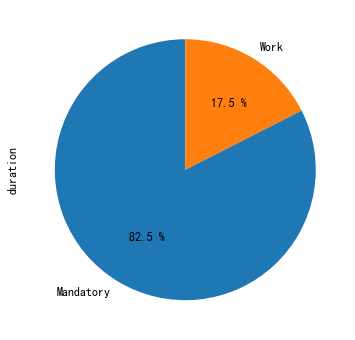

In [16]:
a = df_detail_today.groupby('tags').agg({'duration': 'sum'}).reset_index()
a.set_index('tags')['duration'].plot.pie(autopct=' % 1.1f %% ', startangle=90, figsize=(6, 6), fontsize=12)

In [17]:
df_detail_today

,description,project_name,tags,client_name,duration,占比,标准时间格式,日期
0,出发到青岛,高铁,Mandatory,交通,24236,82.50%,6:43:56,2024-04-02
1,技术架构文档修改,风险管理平台,Work,主业工作,5142,17.50%,1:25:42,2024-04-02


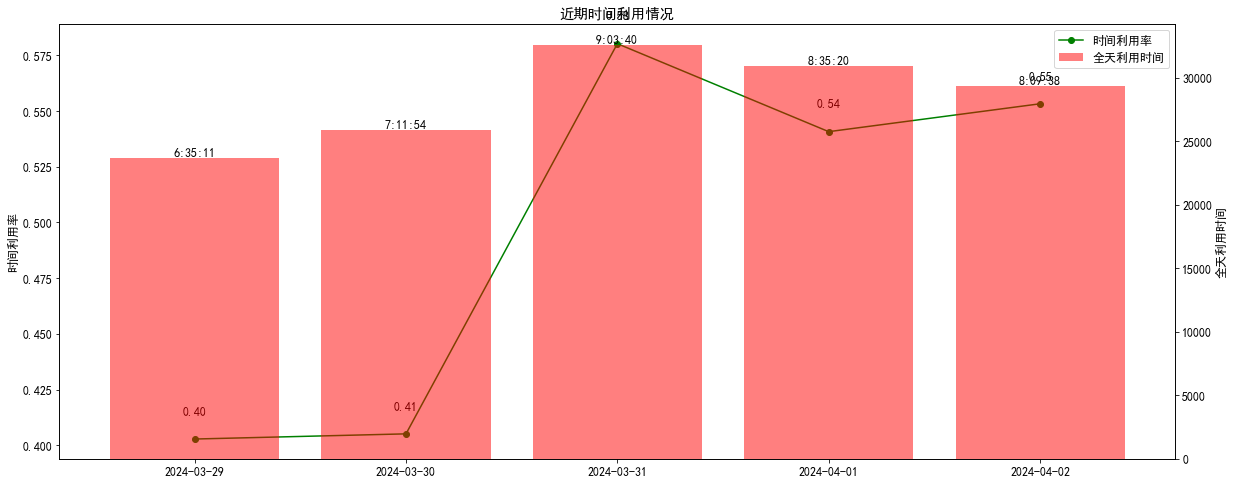

In [18]:
# 画图
plot_contrast_time_use_rate(df_all_day_statistic_total)